In [3]:
#Packages
from bs4 import BeautifulSoup
import requests
import pandas as pd
import json

In [4]:
# api adress: https://ies-midterm.soulution.rocks/

In [5]:
rq = requests.get('https://ies-midterm.soulution.rocks/')

In [6]:
rq

<Response [403]>

In [11]:
#send payload
pay = '{"cuni":"41000203"}'
rq = requests.post('https://ies-midterm.soulution.rocks/login',pay)

In [12]:
rq

<Response [200]>

In [13]:
#Store
data = json.loads(rq.text)

In [14]:
data

{'data': {'personal_code': 'c92daf9e',
  'dataset_ids': ['f45ec2e9fc',
   '5df3513c79',
   '775352ba11',
   'f894683be9',
   '2d1aef30ed',
   '7be200ce5b']},
 'message': 'Hello, Kos Jiří! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook.'}

In [15]:
# print personal code
data['data']['personal_code']

'c92daf9e'

In [22]:
#store codes
codes_data = data['data']["dataset_ids"]
codes_data

['f45ec2e9fc',
 '5df3513c79',
 '775352ba11',
 'f894683be9',
 '2d1aef30ed',
 '7be200ce5b']

In [143]:
#For loop /data/{data_code} 
dataset = {} #empty to collect data
for data_code in codes_data:
    rq = requests.get(f'https://ies-midterm.soulution.rocks/data/{data_code}')
    while rq.status_code !=200:  
        rq =requests.get(f'https://ies-midterm.soulution.rocks/data/{data_code}')
    dat =rq.json()['data']
    
    ticker = dat['company']
    datas = pd.DataFrame(dat['data']).set_index('Date')
    datas.index = pd.to_datetime(datas.index)
    dataset[ticker] = datas

In [145]:
#Convert to dataframe
dataframe = pd.concat(dataset)
dataframe

Open                High                 Low  \
    Date                                                                     
AAL 2019-01-02  31.459999084472656  32.650001525878906  31.049999237060547   
    2019-01-03  31.690000534057617  31.850000381469727  28.809999465942383   
    2019-01-04  30.440000534057617   32.09000015258789  30.399999618530273   
    2019-01-07  31.989999771118164   33.47999954223633  31.239999771118164   
    2019-01-08   33.36000061035156  33.650001525878906   32.20000076293945   
...                            ...                 ...                 ...   
SVT 2020-11-17   7.659999847412109   7.869999885559082   7.349999904632568   
    2020-11-18   7.329999923706055   7.329999923706055   7.329999923706055   
    2020-11-19    7.53000020980835    7.53000020980835   7.309999942779541   
    2020-11-20   7.360000133514404   7.360000133514404   7.150000095367432   
    NaT                        NaN                 NaN                 NaN   

                             Close           Adj.Close    Volume  
    Date                                                          
AAL 2019-01-02   32.47999954223633  31.963159561157227   5229500  
    2019-01-03  30.059999465942383    29.5816650390625  16822000  
    2019-01-04  32.040000915527344  31.530160903930664   9369600  
    2019-01-07   32.95000076293945   32.42567825317383   8010700  
    2019-01-08   32.41999816894531  31.904109954833984   7107700  
...                            ...                 ...       ...  
SVT 2020-11-17   7.360000133514404   7.360000133514404      5900  
    2020-11-18   7.329999923706055   7.329999923706055       700  
    2020-11-19   7.360000133514404   7.360000133514404      5400  
    2020-11-20   7.150000095367432   7.150000095367432      2000  
    NaT                        NaN                 NaN       NaN  

[2100 rows x 6 columns]

In [146]:
#the time series should be from 2019-01-02 to 2020-11-20. Is it the case in your sample?
#delete NA
dataframe.dropna(how='all',inplace = True)
dataframe

Open                High                 Low  \
    Date                                                                     
AAL 2019-01-02  31.459999084472656  32.650001525878906  31.049999237060547   
    2019-01-03  31.690000534057617  31.850000381469727  28.809999465942383   
    2019-01-04  30.440000534057617   32.09000015258789  30.399999618530273   
    2019-01-07  31.989999771118164   33.47999954223633  31.239999771118164   
    2019-01-08   33.36000061035156  33.650001525878906   32.20000076293945   
...                            ...                 ...                 ...   
SVT 2020-11-16   7.869999885559082   8.039999961853027   7.300000190734863   
    2020-11-17   7.659999847412109   7.869999885559082   7.349999904632568   
    2020-11-18   7.329999923706055   7.329999923706055   7.329999923706055   
    2020-11-19    7.53000020980835    7.53000020980835   7.309999942779541   
    2020-11-20   7.360000133514404   7.360000133514404   7.150000095367432   

                             Close           Adj.Close    Volume  
    Date                                                          
AAL 2019-01-02   32.47999954223633  31.963159561157227   5229500  
    2019-01-03  30.059999465942383    29.5816650390625  16822000  
    2019-01-04  32.040000915527344  31.530160903930664   9369600  
    2019-01-07   32.95000076293945   32.42567825317383   8010700  
    2019-01-08   32.41999816894531  31.904109954833984   7107700  
...                            ...                 ...       ...  
SVT 2020-11-16   7.340000152587891   7.340000152587891     25300  
    2020-11-17   7.360000133514404   7.360000133514404      5900  
    2020-11-18   7.329999923706055   7.329999923706055       700  
    2020-11-19   7.360000133514404   7.360000133514404      5400  
    2020-11-20   7.150000095367432   7.150000095367432      2000  

[2094 rows x 6 columns]

In [147]:
#what is the highest and lowest Adj Close price the company recorded?
#add ticker
dataframe.index.names = ['ticker','date']
dataframe
dataframe.groupby('ticker')['Adj.Close'].max()


ticker
AAL     9.890000343322754
SLA     84.69000244140625
SMIN    39.71310806274414
RTO                1865.0
RIO     65.43000030517578
SVT     9.979999542236328
Name: Adj.Close, dtype: object

In [148]:
dataframe.groupby('ticker')['Adj.Close'].min()

ticker
AAL     10.020000457763672
SLA     47.939998626708984
SMIN     20.77176284790039
RTO                 1865.0
RIO        35.546142578125
SVT                   10.0
Name: Adj.Close, dtype: object

In [149]:
#object, we have to convert to float
dataframe = dataframe.apply(lambda a: pd.to_numeric(a))
dataframe
dataframe.groupby('ticker')['Adj.Close'].max()

ticker
AAL       36.441425
SLA       84.690002
SMIN      39.713108
RTO     1865.000000
RIO       65.430000
SVT       13.249181
Name: Adj.Close, dtype: float64

In [141]:
dataframe.groupby('ticker')['Adj.Close'].min()

ticker
AAL        9.040000
SLA       47.939999
SMIN      20.771763
RTO     1865.000000
RIO       35.546143
SVT        5.960000
Name: Adj.Close, dtype: float64

In [150]:
#what day was the highest number of shares traded
dataframe.groupby('ticker')['Volume'].idxmax()

ticker
AAL      (AAL, 2020-06-05 00:00:00)
SLA      (SLA, 2020-04-21 00:00:00)
SMIN    (SMIN, 2020-04-16 00:00:00)
RTO      (RTO, 2020-01-24 00:00:00)
RIO      (RIO, 2019-03-19 00:00:00)
SVT      (SVT, 2019-03-15 00:00:00)
Name: Volume, dtype: object

In [151]:
#what is the total of shares traded
dataframe.groupby('ticker')['Volume'].sum()

ticker
AAL     16640483900
SLA         6444849
SMIN       29874000
RTO               0
RIO      1125708200
SVT         1529700
Name: Volume, dtype: int64

<AxesSubplot:xlabel='date'>

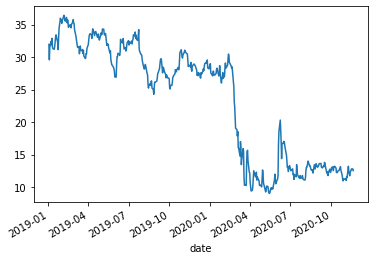

In [152]:
#AAL highest
dataframe.loc['AAL',:]['Adj.Close'].plot()

In [ ]:
#